# Image Classification with PyTorch: Gender Recognition

The model classifies facial images into two categories: male and female. Leveraging the powerful feature extraction capabilities of the pretrained ResNet18 model, this implementation provides an effective solution for gender classification tasks.

## Implementation
1. The model is implemented in PyTorch with the following steps:
2. Load Pretrained Model: Initialize ResNet18 with pretrained weights.
3. Modify Final Layer: Adapt the final fully connected layer to produce two output classes.
    * Define Loss Function and Optimizer:
    * Loss Function: Binary Cross Entropy Loss (BCELoss).
    * Optimizer: Adam.
4. Training: Train the model using the prepared dataset, adjusting hyperparameters such as learning rate and batch size based on validation performance.

In [1]:
# importing the libraries
import os
import numpy as np
import pandas as pd
import torch
import torchvision
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn.functional as F
import time 
from sklearn.metrics import f1_score
import torchvision.models as models
from PIL import Image

## Downloading the dataset  And preprocessing 
downloading the dateset from the male-and-female-faces-dataset 

In [2]:
dataset_path='/kaggle/input/male-and-female-faces-dataset/Male and Female face dataset'

In [3]:
# Define data transformations for data augmentation and normalizatiom
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

In [4]:
#downloading the dataset and transforming it while downloading
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

In [5]:
#spliting up of the dataset into traning and validation
dataset_size = len(dataset)
val_size = int(0.2 * dataset_size)  # 20% for validation
train_size = dataset_size - val_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [6]:
#creating the data loader
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

In [7]:
#Accessing the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [8]:
#checking the size of the image 
for batch in train_loader:
    images, labels = batch
    print(images.shape)  # Shape of image batch
    print(labels.shape)  # Shape of label batch
    break  # Exit after the first batch

torch.Size([32, 3, 224, 224])
torch.Size([32])


## Building  The Model

Instead of building a CNN from scratch, we'll use a pre-trained ResNet model from torchvision.models and fine-tune it for our classification task. Pre-trained models have been trained on large datasets like ImageNet and can be adapted to specific tasks with transfer learning.

In [9]:
# Using a pretrained Resnet18 model with the modified final layer to give a binary classification
class ResNet18BinaryClassifier(nn.Module):
    def __init__(self):
        super(ResNet18BinaryClassifier, self).__init__()
        self.resnet18 = models.resnet18(pretrained=True)
        self.resnet18.fc = nn.Linear(self.resnet18.fc.in_features, 2)

    def forward(self, x):
        return self.resnet18(x)

In [10]:
model = ResNet18BinaryClassifier().to(device)
criterion = nn.CrossEntropyLoss()  
optimizer = optim.AdamW(model.parameters(), lr=0.001)  

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Training

In [11]:
for epoch in range(10):  
    start_time = time.time()
    
    model.train() 
    running_loss = 0.0
    
    for inputs, labels in train_loader: 
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  
        loss = criterion(outputs, labels)  
        loss.backward()  
        optimizer.step()  
        
        running_loss += loss.item()  
    
    end_time = time.time()
    execution_time = end_time - start_time
    
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}, Time: {execution_time:.2f} seconds")

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1, Loss: 0.4079822290907888, Time: 55.73 seconds


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 2, Loss: 0.27491202528643255, Time: 57.16 seconds


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 3, Loss: 0.23449889762217507, Time: 56.68 seconds


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 4, Loss: 0.23557837077361696, Time: 55.96 seconds


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 5, Loss: 0.21542797445812645, Time: 57.40 seconds


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 6, Loss: 0.19098783454255147, Time: 56.76 seconds


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 7, Loss: 0.19646483572090373, Time: 56.67 seconds


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 8, Loss: 0.177384337026845, Time: 56.63 seconds


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 9, Loss: 0.17263781703899012, Time: 56.35 seconds


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 10, Loss: 0.1644160097793621, Time: 55.99 seconds


## evaluating 

In [12]:
model.eval()  
correct = 0
total = 0
all_labels = []
all_preds = []

with torch.no_grad():  
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)  
        all_labels.extend(labels.cpu().numpy())     
        all_preds.extend(predicted.cpu().numpy())   
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Validation Accuracy: {accuracy:.2f}%')

# Calculate F1 score
f1 = f1_score(all_labels, all_preds, average='weighted')
print(f'Validation F1 Score: {f1:.2f}')

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Accuracy: 93.72%
Validation F1 Score: 0.94


In [13]:
# Saving  the model
torch.save(model.state_dict(), '/kaggle/working/Gender_Recognizer.pth')

## Testing

Testing the model on unseen data. The photos used are genrated by the Ai, The person who doesn't exist

In [14]:
import torch
import torch.nn as nn
import torchvision.models as models

class ResNet18BinaryClassifier(nn.Module):
    def __init__(self):
        super(ResNet18BinaryClassifier, self).__init__()
        # Load the pre-trained ResNet-18 model
        self.resnet18 = models.resnet18(pretrained=True)
        # Modify the final fully connected layer for binary classification
        self.resnet18.fc = nn.Linear(self.resnet18.fc.in_features, 2)

    def forward(self, x):
        return self.resnet18(x)


In [15]:
# Create an instance of the model
model = ResNet18BinaryClassifier()
model.load_state_dict(torch.load('/kaggle/working/Gender_Recognizer.pth'))
model.eval()


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet18BinaryClassifier(
  (resnet18): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affi

The predicted class is: female


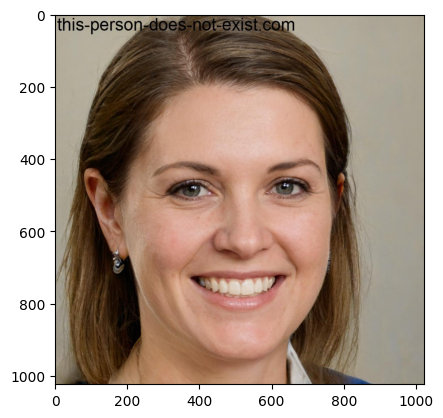

In [16]:
import matplotlib.pyplot as plt
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

# Load and preprocess an image
image_path = '/kaggle/input/unseen-photos/download.jpeg'
image = Image.open(image_path)
plt.imshow(image)  #showing the image
image = transform(image).unsqueeze(0) 

image = image.to(device)
model.to(device)

with torch.no_grad():
    outputs = model(image)
# Get the predicted class
_, predicted_class = outputs.max(1)

class_names = ['female', 'Male'] 
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')


The predicted class is: Male


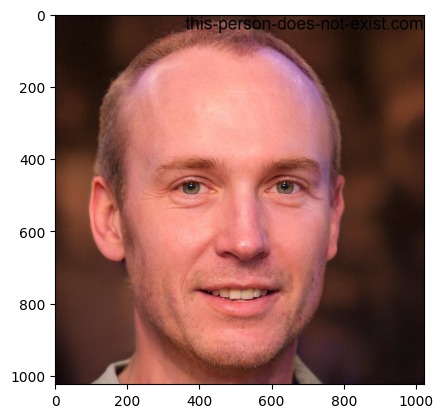

In [17]:
#for second picture
image_path = '/kaggle/input/unseen-photos/download (1).jpeg'
image = Image.open(image_path)
plt.imshow(image)  #showing the image
image = transform(image).unsqueeze(0) 

image = image.to(device)
model.to(device)

with torch.no_grad():
    outputs = model(image)
_, predicted_class = outputs.max(1)

class_names = ['female', 'Male']  
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')

**End of Project**